# CA5 Phase2

### The purpose of this project is to create a Neural Network with TensorFlow and Keras library and Train it with given dataset and then test it with given test dataset

# Imports

In [22]:
import os
import random
import tensorboard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from sklearn.metrics import classification_report

# Body

# Part 1: Data Analysis and Preprocess¶

In [2]:
train_path = "../dataset/train"

In [3]:
img_path = []
labels = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    for img in os.listdir(folder_path):
        img_path.append(os.path.join(folder_path, img))
        labels.append(folder)

In [4]:
df = pd.DataFrame({
    "image" : img_path,
    "label" : labels
})

In [5]:
df.count()

image    1953
label    1953
dtype: int64

In [6]:
df['label'].value_counts().count()

4

In [7]:
df['label'].value_counts()

bald_eagle    523
racoon        509
elk           462
raven         459
Name: label, dtype: int64

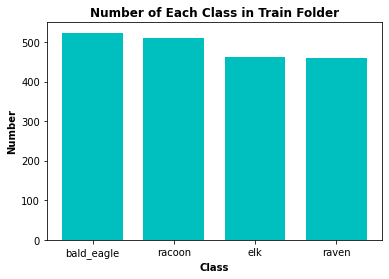

In [8]:
plt.bar(
    df['label'].value_counts().keys(),
    df['label'].value_counts().values,
    color='c',
    width=.75
)
plt.xlabel("Class", fontweight ='bold')
plt.ylabel("Number", fontweight ='bold')
plt.title("Number of Each Class in Train Folder", fontweight ='bold')
plt.show()

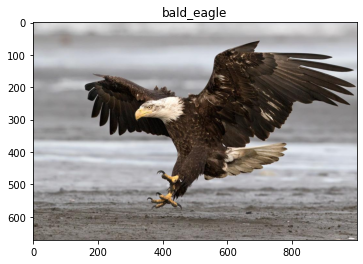

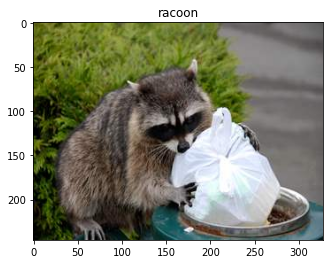

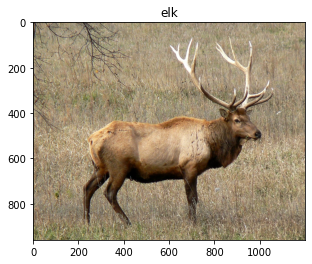

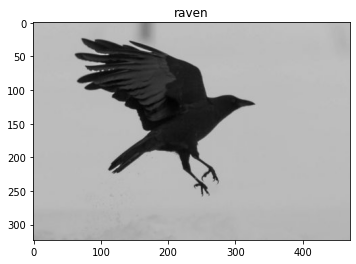

In [9]:
for name in df['label'].value_counts().keys():
    rand_num = random.randint(0, len(df))
    while df['label'][rand_num] != name:
        rand_num = random.randint(0, len(df))
    img = load_img(df['image'][rand_num])
    title = df['label'][rand_num]
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [10]:
classes_labels = {
    df['label'].value_counts().keys()[i] : i for i in range(0, df['label'].value_counts().count())
}

In [11]:
classes_labels

{'bald_eagle': 0, 'racoon': 1, 'elk': 2, 'raven': 3}

In [12]:
df['label']

0       bald_eagle
1       bald_eagle
2       bald_eagle
3       bald_eagle
4       bald_eagle
           ...    
1948        racoon
1949        racoon
1950        racoon
1951        racoon
1952        racoon
Name: label, Length: 1953, dtype: object

In [13]:
for i in range(len(df)):
    df['label'][i] = classes_labels[df['label'][i]]

In [14]:
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
1948    1
1949    1
1950    1
1951    1
1952    1
Name: label, Length: 1953, dtype: object

In [15]:
one_hot = [str(to_categorical(i, df['label'].value_counts().count())) for i in df['label']]

In [16]:
df['label'] = one_hot

In [17]:
df['label']

0       [1. 0. 0. 0.]
1       [1. 0. 0. 0.]
2       [1. 0. 0. 0.]
3       [1. 0. 0. 0.]
4       [1. 0. 0. 0.]
            ...      
1948    [0. 1. 0. 0.]
1949    [0. 1. 0. 0.]
1950    [0. 1. 0. 0.]
1951    [0. 1. 0. 0.]
1952    [0. 1. 0. 0.]
Name: label, Length: 1953, dtype: object

### As seen above, labels are one hot encoded

### We dont have an order or rank in our classes, but, when label encoding is performed, the class names are ranked. Due to this, there is a very high probability that the model captures the relationship between classes based on their ranks. So, we use One Hot Encoding to solve this problem.

In [18]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255.0,
    validation_split = 0.25
)

In [19]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True,
    validate_filenames = False
)   

Found 1465 non-validated image filenames belonging to 4 classes.


In [20]:
ValidationData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'label',
    target_size = (128, 128),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True,
    validate_filenames = False
)

Found 488 non-validated image filenames belonging to 4 classes.


# Part 2: Make Neural Network

In [23]:
input = layers.Input(shape=(128, 128, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(4, activation = "softmax")(output)